In [1]:
%load_ext tikzmagic
%matplotlib inline

# 회귀분석이란

어떤 수치형 변수의 값이 다른 변수의 값에 의해 어떻게 영향을 받는지를 분석하는 방법을 <b>회귀분석(regression analysis)</b>이라고 한다. 

회귀분석을 하려면 영향을 주는 변수들과 영향을 받는 변수가 무엇인지를 결정해야 한다. 회귀분석에서 분석의 대상이 되는 수치형 변수를 <b>종속변수(independent variable)</b>라 하고 그 종속변수에 영향을 주는 다른 변수들을 <b>독립변수(dependent variable)</b>라 한다. 보통 종속변수는 $y$ 기호로 나타내고 독립변수는 $x$ 기호로 나타낸다. 독립변수가 여러개 있을 때는 $x_1, x_2, \ldots, x_K$ 등으로 아랫첨자를 이용하여 표시한다.

회귀분석에서 종속변수와 독립변수의 관계는 다음과 같은 다이어그램으로 표현할 수 있다. 화살표는 변수간의 관계를 나타내는 것으로 독립변수에서 종속변수를 향하는 방향으로 그린다. 

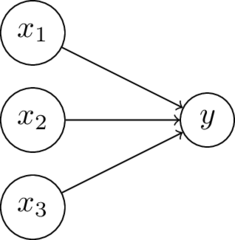

In [2]:
%%tikz
\node[draw,circle] (x1) at (0,2) {$x_1$};
\node[draw,circle] (x2) at (0,1) {$x_2$};
\node[draw,circle] (x3) at (0,0) {$x_3$};
\node[draw,circle] (y) at (2,1) {$y$};
\draw[->] (x1)--(y);
\draw[->] (x2)--(y);
\draw[->] (x3)--(y);

## 회귀분석 문제의 예

다음 데이터는 1940년부터 1950년까지의 미국 전체의 소득(income)과 지출(expenditure) 데이터다. 테이블에서 하나의 레코드는 하나의 연도(year)를 나타낸다. war 열은 전쟁이 있던 연도에는 1, 그렇지 않은 연도에는 0인 값이다.

In [3]:
import statsmodels.api as sm

df = sm.datasets.get_rdataset("USConsump1950", "AER").data
df

,income,expenditure,war
0,241,226,0
1,280,240,0
2,319,235,1
3,331,245,1
4,345,255,1
5,340,265,1
6,332,295,0
7,320,300,0
8,339,305,0
9,338,315,0


이 데이터를 다음과 같이 소득을 가로축으로 하고 지출을 세로축으로 한 스캐터플롯(scatter plot)으로 표시하자. 이 그래프에서는 하나의 점이 하나의 연도 즉, 하나의 레코드를 표시한다. 

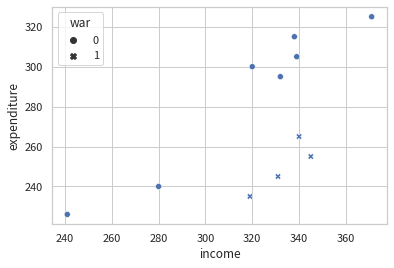

In [4]:
import seaborn as sns

sns.scatterplot(data=df, x="income", y="expenditure", style="war")
plt.show()

이 그래프를 보면 소득이 증가한 경우에는 지출도 같이 증가하는 것처럼 보인다. 또한 우측 하단의 데이터로부터 전쟁이 있는 경우에는 지출이 하락하는 것을 볼 수 있다. 따라서 다음과 같은 회귀분석 문제를 생각할 수 있다. 

* 독립변수 : 소득, 전쟁여부
* 종속변수 : 지출

우리는 소득과 전쟁여부가 지출에 주는 영향을 분석하는 회귀분석을 통해 다음과 같은 질문에 대한 답을 얻을 수 있다. 

* 소득이 증가할 때 정말 지출이 증가하는가?
* 소득이 단위소득(1)만큼 증가할 때 지출은 어느정도 증가하는가?
* 전쟁이 있을 경우와 없을 경우 지출이 달라지는가?
* 전쟁이 있을 경우와 없을 경우 어느정도 지출이 달라지는가?



## 회귀분석의 예

위와 같은 회귀분석 문제는 여러가지 방법으로 풀 수 있다. 다음은 선형회귀분석이라는 방법으로 위 문제를 푸는 코드를 보여주고 있다. 
문제를 풀면 코드의 출력과 같은 형식의 정보가 표시된다. 회귀분석 문제를 푼다는 것은 이 정보를 제대로 읽고 해석하는 과정을 포함한다.

In [5]:
import statsmodels.formula.api as smf

m = smf.ols('expenditure ~ income + C(war)', data=df)
r = m.fit()
print(r.summary())

                            OLS Regression Results                            
Dep. Variable:            expenditure   R-squared:                       0.946
Model:                            OLS   Adj. R-squared:                  0.933
Method:                 Least Squares   F-statistic:                     70.61
Date:                Sun, 12 Jun 2022   Prob (F-statistic):           8.26e-06
Time:                        15:08:05   Log-Likelihood:                -38.263
No. Observations:                  11   AIC:                             82.53
Df Residuals:                       8   BIC:                             83.72
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      14.4954     27.299      0.531      

위 회귀분석 결과를 해석하면 다음과 같은 결론을 얻을 수 있다. 

* 소득이 증가할 때 정말 지출도 증가한다.
* 소득이 단위소득(1)만큼 증가할 때 지출은 약 0.9 정도 증가한다.
* 전쟁이 있을 경우 지출은 감소한다.
* 전쟁이 있을 경우 지출은 약 51 정도 감소한다.

위 결과에서 이 정보를 읽고 해석하는 방법은 다음 절부터 차근차근 설명하도록 한다. 

또한 이 분석이 제대로 된 분석인지 아닌지, 그리고 더 좋은 분석을 수행하려면 어떻게 해야 하는지도 같이 설명한다.